### Graph class with adjacency list
- Used to implement DFS, BFS and Dijkstra algorithms

In [1]:
import sys
import matplotlib.pyplot as plt

class Graph:
    # Constructor Method for graph class
    def __init__(self, nodes, isWeighted, isDirected):
        self.isDirected = isDirected            
        self.nodes = nodes              # Assign the number of the nodes of the graph
        self.isWeighted = isWeighted     
        self.edges = [[] for node in range(self.nodes)]     # adjacency list of the graph
    
    # Print method for debug purposes
    def print(self):
        for i in range(self.nodes - 1):
            print(f"In the node {i} we have edge (destino, valor):{self.nodes[i]}\n")

    # Insert a edge in the graph
    def insert_edge(self, source, dest, weight):                       
        # Check if the graph is valid
        if self.nodes == 0:                                                  
            return
        # Check if the edge is valid
        if source < 0 or source>=self.nodes or dest<0 or dest>=self.nodes:    
            return

        self.edges[source].append([dest, weight]) 
        # if it's not directed, the process repeat symmetrically 
        if not self.isDirected:                                                  
            self.edges[dest].append([source, weight])
        
    # Polymorphic method for not weighted graph
    def insert_edge(self, source, dest, weight = 0):     
        # Check if the graph is valid
        if self.nodes == 0:                                                  
            return
        # Check if the edge is valid
        if source < 0 or source>=self.nodes or dest<0 or dest>=self.nodes:    
            return
        
        self.edges[source].append([dest, weight])                                     
        # if it's not directed, the process repeat simmetrically 
        if not self.isDirected:                                                   
            self.edges[dest].append([source, weight])

    # Get the degree of the node      
    def get_degree(self, source):
        if self.isDirected:
            input_deg = 0
            # Get the output degree of the node
            for i in range(self.nodes): 
                k = 0
                while k < len(self.edges[i]):
                    # Check the number of incident edge in the node
                    if self.edges[i][k][0] == source:
                        input_deg = input_deg + 1
                    k = k + 1
            # Return a list with input and output degree
            return [input_deg, len(self.edges[source])]
        else:
            # Not being directed, return a list with unique value, the expect
            # degree
            return [len(self.get_adj_list(source))]

    ## Get adjancency list of the graph
    def get_adj_list(self, source):
        return self.edges[source]

    ## get the number of the nodes in the graph
    def get_n_nodes(self):
        return self.nodes

    def get_degree(self, source):
        if self.isDirected:
            input_degree = 0
            # Check output degree for each node
            for i in range(self.nodes): 
                k = 0
                while k < len(self.edges[i]):
                    # Check incident edge in the input of the node
                    if self.edge[i][k][0] == source:
                        input_degree = input_degree + 1
                    k = k + 1
            # The method returns a list with input and ouput degree
            return [input_degree, len(self.edges[source])]
        else:
            # Don't being a directed graph, return the degree of the node
            return [len(self.get_adj_list(source))]   

    ## Auxiliary method used in the Dijkstra algorithm
    def min_distance(self, distance, visited, source):
        min_node = source
        ## A value extremely bigger. An abstraction of infinity
        min = sys.maxsize

        ## Defines the node with shortest distance not yet visited
        for i in range(self.nodes):
            if distance[i] < min and  visited[i] == False:
                min = distance[i]
                min_node = i
        return min_node

    # Method that implments Dijsktra Algorithm
    def dijkstra(self, source):
        # Initialize an array with values extremely high
        distance = [sys.maxsize] * self.nodes
        # Assign 0 to distance in the source node
        distance[source] = 0
        visited = [False] * self.nodes
        min_node = 0

        # Ok, i know, it's extremely inefficient :). In this way
        # take a look in a graph implemented with
        # adjacency matrix, it's a better approach.
        for k in range(self.nodes):
            min_node = self.min_distance(distance, visited, k)
            for i in range(self.nodes):
                for j in range(self.nodes):
                    for m in self.get_adj_list(j):
                        if j == min_node and m[0] == i:
                            if visited[i] == False and distance[i] > distance[min_node]:
                                distance[i] = distance[min_node] + 1
            visited[min_node] = True
        return distance

    # Method that implements Breadth-first Search
    def bfs(self, node, counter):
        visited = [0] * self.nodes
        queue = []
        queue.append(node)
        visited[node] = counter

        # While exist element wihtin the queue
        while queue:
            pop_node = queue.pop()
            for j in self.get_adj_list(pop_node):
                if visited[j[0]] == 0:
                    counter += 1
                    queue.append(j[0])
                    visited[j[0]] = counter
        return visited

    # Implementation of iterative Depth-First Search
    def non_recursive_dfs(self, node):
        visited = [False] * self.nodes
        queue = []
        visited.append(node) 
        queue.append(node)

        while queue:
            current = queue.pop()
            # check if the node has been visited
            if not visited[current]:
                print(f'{current}', end=' ')
                visited[current] = True

            # Add the adjacency nodes of current in the queue
            for j in self.get_adj_list(current):
                if visited[j[0]] == 0:
                    queue.append(j[0])

    # Method that implements Depth-first search
    def dfs(self, node, counter, visited):
        visited[node] = counter
        counter += 1
        for j in self.get_adj_list(node):
            # Check if the node has not been visited
            if visited[j[0]] == 0:
                self.dfs(j[0], counter, visited)
            else:
                continue
        return visited

    def isCyclicUtil(self, node, visited, parent):
        visited[node] = True
        for i in self.get_adj_list(node):
            if not visited[i[0]]:
                if self.isCyclicUtil(i[0], visited, node):
                    return True
                # if 'i' adjacency node is already visited, and this node
                # it's not parent of previous node, so there is a cycle in this graph
            elif parent != i[0]:
                return True
        return False

    def isCyclic(self):
        visited = [False] * self.nodes
        for j in range(self.nodes):
            if not visited[j]:
                if self.isCyclicUtil(j, visited, -1):
                    return True
        return False

    ## Check an existence of any edge
    def isEdge_exist(self, source, dest):
        # Check if edge is valid
        if source < 0 or source > self.nodes or dest < 0 or dest >= self.nodes:    
            return False
        j = 0
        try:
            while self.edges[source][j][0] != dest:
                j = j + 1
            if self.edges[source][j][0] == dest:                                    
                return True
            else:
                return False
        except IndexError:
            return False   

    ## Check if the graph is directed
    def get_isDirected(self):
        return self.isDirected

    ## Remove any edge of the graph
    def remove_edge(self, source, dest, isDirected):
        if self.nodes == 0:                                                      
            return
        if source < 0 or source >= self.nodes or dest < 0 or dest >= self.nodes:  
            return
        if not self.isWeighted:                                                   
            j = 0
            # Search edge in the array of edges[source] with the destiny node search
            while self.edges[source][j] != dest:                                    
              j += 1
              if j >= len(self.edges[source]):                                       
                print("Edge not found!\n")
                return
            # Remove the edge
            del self.edges[source][j]   
            # if it's not directed, the process repeat simmetrically 
            if not self.isDirected:                                                       
                self.remove_edge(dest, source, True)
         # if not weighted, remove followint this approach
        else:                                          
            j = 0
            # Procura a aresta por meio do item destino(posição 0 do subarray) 
            # no array do vertice de origem
            while self.edges[source][j][0] != dest:     
                j += 1
                 # If not found
                if j >= len(self.edges[source]):       
                    print("This edge doesn't exist!\n")
                    return
            # Remove the edge
            del self.edges[source][j]                  
           # if it's not directed, the process repeat simmetrically  
            if not self.isWeighted:                          
                self.remove_edge(dest, source, True)

## Depth First Search Test

Source:A
Node	Depth
A			1
B			2
C			5
D			4
E			2
F			2
G			3
H			5


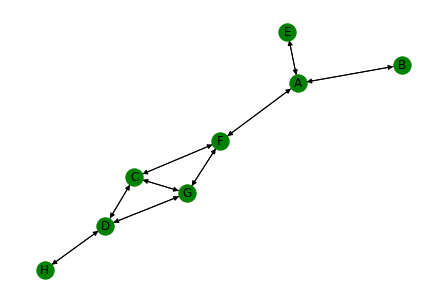

In [5]:
import networkx as nx

nodes = {0: 'A', 1: 'B', 2: 'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H'}

# Create a graph with 8 node
gr = Graph(8, False, True)
gr.insert_edge(0, 1)
gr.insert_edge(0, 4)
gr.insert_edge(0, 5)
gr.insert_edge(1, 0)
gr.insert_edge(2, 6)
gr.insert_edge(2, 3)
gr.insert_edge(2, 5)
gr.insert_edge(3, 7)
gr.insert_edge(3, 6)
gr.insert_edge(3, 2)
gr.insert_edge(4, 0)
gr.insert_edge(5, 0)
gr.insert_edge(5, 6)
gr.insert_edge(5, 2)
gr.insert_edge(6, 3)
gr.insert_edge(6, 5)
gr.insert_edge(6, 2)
gr.insert_edge(7, 3)


visited = [0] * gr.get_n_nodes()

source = 0
depth = gr.dfs(source, 1, visited)
print(f'Source:{nodes.get(source)}\nNode\tDepth')
for i in range(gr.get_n_nodes()):
    print(f'{nodes.get(i)}\t\t\t{depth[i]}')

## Plot the graph 
g = nx.DiGraph() 
for i in range(gr.get_n_nodes()):
    for j in gr.get_adj_list(i):
        g.add_edge(nodes.get(i), nodes.get(j[0]))
nx.draw(g, with_labels = True, node_color='green')

del gr

## Breadth First Search Test


Source: A
Node	Visit Order
A 			1º
B 			2º
C 			6º
D 			7º
E 			3º
F 			4º
G 			5º
H 			8º


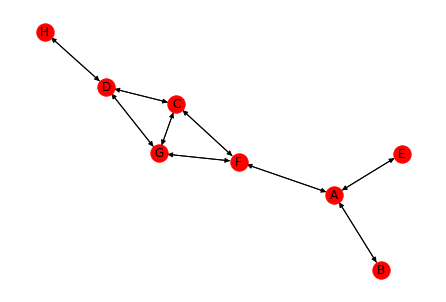

In [6]:
import networkx as nx

nodes = {0: 'A', 1: 'B', 2: 'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H'}

# Plot the graph
gr = Graph(8, False, True)
gr.insert_edge(0, 1)
gr.insert_edge(0, 4)
gr.insert_edge(0, 5)
gr.insert_edge(1, 0)
gr.insert_edge(2, 6)
gr.insert_edge(2, 3)
gr.insert_edge(2, 5)
gr.insert_edge(3, 7)
gr.insert_edge(3, 6)
gr.insert_edge(3, 2)
gr.insert_edge(4, 0)
gr.insert_edge(5, 0)
gr.insert_edge(5, 6)
gr.insert_edge(5, 2)
gr.insert_edge(6, 3)
gr.insert_edge(6, 5)
gr.insert_edge(6, 2)
gr.insert_edge(7, 3)


source = 0
order = gr.bfs(source, 1)
print(f'Source: {nodes.get(source)}\nNode\tVisit Order')
for i in range(gr.get_n_nodes()):
    print(f'{nodes.get(i)} \t\t\t{order[i]}º')


## Plot the graph
g = nx.DiGraph() 
for i in range(gr.get_n_nodes()):
    for j in gr.get_adj_list(i):
        g.add_edge(nodes.get(i), nodes.get(j[0]))
        
nx.draw(g, with_labels = True, node_color='red')

del gr

## Dijkstra Algorithm Test

Source	Destiny	distance
A				A			0
A				B			1
A				C			2
A				D			3
A				E			1
A				F			1
A				G			2
A				H			4


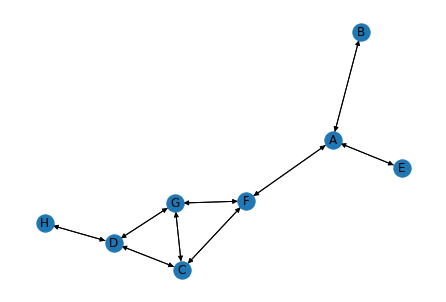

In [7]:
import networkx as nx

nodes = {0: 'A', 1: 'B', 2: 'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H'}

# Create a graph with 8 node
gr = Graph(8, False, True)
gr.insert_edge(0, 1)
gr.insert_edge(0, 4)
gr.insert_edge(0, 5)
gr.insert_edge(1, 0)
gr.insert_edge(2, 6)
gr.insert_edge(2, 3)
gr.insert_edge(2, 5)
gr.insert_edge(3, 7)
gr.insert_edge(3, 6)
gr.insert_edge(3, 2)
gr.insert_edge(4, 0)
gr.insert_edge(5, 0)
gr.insert_edge(5, 6)
gr.insert_edge(5, 2)
gr.insert_edge(6, 3)
gr.insert_edge(6, 5)
gr.insert_edge(6, 2)
gr.insert_edge(7, 3)

source = 0
distance = gr.dijkstra(source)
print('Source\tDestiny\tdistance')

for i in range(gr.get_n_nodes()):
    print(f'{nodes.get(source)}\t\t\t\t{nodes.get(i)}\t\t\t{distance[i]}')


## Plot the graph
g = nx.DiGraph() 
for i in range(gr.get_n_nodes()):
    for j in gr.get_adj_list(i):
        g.add_edge(nodes.get(i), nodes.get(j[0]))
nx.draw(g, with_labels = True)

del gr

## Non-recursive DFS 

0 2 6 5 1 4 3 

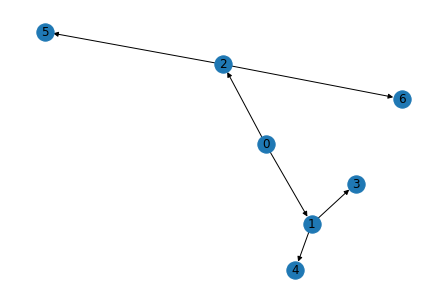

In [8]:
import networkx as nx

# Create a graph with 7 nodes
gr = Graph(7, False, True)
gr.insert_edge(0, 1)
gr.insert_edge(0, 2)
gr.insert_edge(1, 3)
gr.insert_edge(1, 4)
gr.insert_edge(2, 5)
gr.insert_edge(2, 6)

source = 0
depth = gr.non_recursive_dfs(source)

# Plot the graph
g = nx.DiGraph() 
for i in range(gr.get_n_nodes()):
    for j in gr.get_adj_list(i):
        g.add_edge(i, j[0])
nx.draw(g, with_labels = True)

del gr